In [1]:
import pandas as pd
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import os
import time
from random import randint
import xml.etree.ElementTree as et 
import feedparser
import webbrowser

### We didn't use these methods to gather the funds cik, but it is a good way to collect cik numbers (that submit 13f filings) for future analysis

In [2]:
#latest, and updates every few minutes...around 150 cik -  https://sec.report/Form/13F-HR.rss

i = 0
cik_list3 = []
RSS = feedparser.parse('https://sec.report/Form/13F-HR.rss')
feed_entries = RSS.entries

for entry in feed_entries:
    title = entry.guid
    try: 
        doc = title.split("/")[4]      
        CIK = doc.split("-")[0]
        cik_list3.append(CIK)
        print(CIK)
    except:
        i += 1
        print(i)
        pass



0001785445
0001821984
0001785445
0001085146
0001420506
0001754960
0001859606
0001630243
0001062993
0001792851
0001085146
0000947871
0001606587
0001415345
0001398344
0001085146
0000950123
0001831263
0001732988
0001533964
0001862145
0001732687
0001831263
0001831263
0001843867
0001831263
0001831263
0001843867
0000714142
0001420506
0001567619
0001567619
0001764754
0001567619
0001642274
0000949509
0000949509
0001862145
0001214659
0001493152
0001621225
0001456227
0001845743
0001845743
0001172661
0001750557
0001621855
0001540866
0001849518
0001567619
0001861244
0001861244
0001861244
0001830922
0001861244
0001861244
0001861244
0001861244
0001861244
0001845199
0001861244
0001861244
0001831187
0000919574
0000949509
0001172661
0001104659
0001398344
0001822534
0001822534
0001085146
0001398344
0001420506
0001178913
0001104659
0001844495
0001777141
0001469026
0001569137
0001398344
0001844567
0001398344
0001767868
0001846532
0001095449
0001081019
0001420506
0001085146
0001609251
0001085146
0001750405

In [3]:
cik_set = set(cik_list3)
len(cik_set)

81

In [5]:
#in search shows thousands, but we can scrape only 80 at a time
XMLlink = 'https://www.sec.gov/cgi-bin/srch-edgar?text=form-type%3D%2213F-HR%22%20AND%20Period%3D%2220201231%22&start=1&count=80&first=2020&last=2021&output=atom'

cik_list = []
RSS = feedparser.parse(XMLlink)
feed_entries = RSS.entries

for entry in feed_entries:
    link = entry.link
    cik = link.split("/")[6]
    cik_list.append(cik)

In [7]:
# len(cik_list)

81

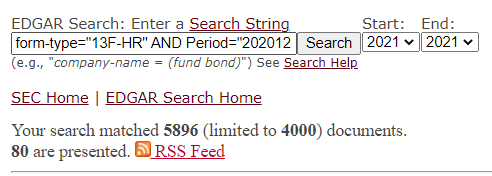

In [4]:
#latest, and updates every few minutes...around 150 cik -  https://sec.report/Form/13F-HR.rss
i = 0
cik_list2 = []
RSS = feedparser.parse('https://sec.report/Form/13F-HR.rss')
feed_entries = RSS.entries

for entry in feed_entries:
    title = entry.description
    try: 
        name = re.search('-\s(.+)\s\(\d+\)\s\(Filer\)', title).group(1)
        CIK = re.search('\((\d+)\)\s\(Filer\)', title)[1]
        cik_list2.append(CIK)
        print(CIK,name)
    except:
        i += 1
        print(i)
        pass
    
    
    
